# Proyecto 05 - Transformación y Mapeo de Datos
## Por Ricardo A. Del Río Guzmán


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importación de Librerías


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd, chdir, listdir
from scipy.stats import trim_mean as tm

# from sys import path
# path.append('/content/drive/My Drive/__libreras_propias')
# from info_tables import *
# from ipynb.fs.defs.info_tables import CatDataStruc

chdir('/content/drive/My Drive/__libreras_propias')
%run info_tables.ipynb
chdir('/content/drive/My Drive/Proyecto 05')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Definiciones de Clases, Funciones y Variables

In [0]:
def save_graph(name):
  if not (name in listdir()):
    plt.savefig(name, bbox_inches="tight")

def save_graph2(name):
  if not (name in listdir()):
    fig.savefig(name, bbox_inches="tight")

# def graph_p(hor_values, ver_values, g_type=0, 
#           hor_label='', ver_label='', title='', 
#           show_save=True, first=True, image=False):
#   options = {0: plt.plot, 1: plt.bar}
#   # Creación y configuración del gráfico:
#   if first:
#     fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
#                     edgecolor='k')
#     plt.tick_params(axis ='x', rotation = 60) 
#   options[g_type](hor_values, ver_values, color ='tomato', linewidth=3)
#   plt.xlabel(hor_label)
#   plt.ylabel(ver_label)
#   plt.title(title)
#   if image:
#     img = plt.imread("mapa-horizontal-completo.png")
#     plt.imshow(img)
#   # Se guarda el gráfico en el drive y se muestra:
#   if show_save:
#     save_graph(title.lower().replace(' ','_') + '.jpg')
    
#     plt.close() 


def analisis(db, name):
  print
  print('La base de datos "{}" tiene {} filas y {} columnas.\n'.format(name, db.shape[0], db.shape[1]))
  display(db.head(3))
  display(db.describe())
  display(db.describe().sum(axis=1))
  print('\n'+ '_'*200 + '\n')


In [0]:
def boxplot_graph(column, name):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(column.values)
  plt.title('Boxplot de Columna ' + name, fontsize=20)
  # save_graph('Boxplot de Columna ' + column)
  plt.show()

  

## Formatos y Configuraciones

In [0]:
sns.set(style='whitegrid')

## Carga de Datos


https://www.kaggle.com/abecklas/fifa-world-cup#WorldCupPlayers.csv


In [0]:
# Se define la ubicación donde se guardarán los datos de las columnas y 
# categorías:
DataBaseTable.set_dir('/content/drive/My Drive/Proyecto 05')

# Se carga la información de las columnas y categorías de cada tabla:
wc_matches_info = DataBaseTable('Partidos Copas Mundiales', '/content/drive/My Drive/Proyecto 05/WorldCupMatches.csv')
wc_players_info = DataBaseTable('Jugadores Copas Mundiales', '/content/drive/My Drive/Proyecto 05/WorldCupPlayers.csv')
wc_info         = DataBaseTable('Copas Mundiales', '/content/drive/My Drive/Proyecto 05/WorldCups.csv')

# Se guardan las bases de datos en una lista:
dbs = [wc_matches_info, wc_players_info, wc_info]

## 1) Análisis Exploratorio Inicial
Realizar un análisis exploratorio de los datos identificando la presencia de datos nulos y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas.

### Medidas Descriptivas

In [7]:
# Se hace el análisis de medidas descriptivas a cada base de datos:
for db in dbs:
  analisis(db.table, db.name)  

La base de datos "Partidos Copas Mundiales" tiene 4572 filas y 20 columnas.



,año,fecha_y_hora,etapa,estadio,ciudad,equipo_local,goles_del_equipo_local,goles_del_equipo_visitante,equipo_visitante,comentarios_de_la_victoria,asistencia,goles_primer_tiempo,goles_segundo_tiempo,árbitro,asistente_1,asistente_2,id_ronda,id_partido,iniciales_local,iniciales_visita
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


,año,goles_del_equipo_local,goles_del_equipo_visitante,asistencia,goles_primer_tiempo,goles_segundo_tiempo,id_ronda,id_partido
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


count    6.814000e+03
mean     7.205579e+07
std      1.383768e+08
min      4.156000e+03
25%      3.342175e+04
50%      4.610050e+04
75%      4.426316e+07
max      3.977730e+08
dtype: float64


________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "Jugadores Copas Mundiales" tiene 37784 filas y 9 columnas.



,id_ronda,id_partido,iniciales_equipo,nombre_entrenador,titularidad,numero_camiseta,nombre_jugador,posicion,evento
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


,id_ronda,id_partido,numero_camiseta
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


count    1.133520e+05
mean     7.467881e+07
std      1.400930e+08
min      2.260000e+02
25%      1.467000e+03
50%      2.564000e+03
75%      9.766595e+07
max      3.975971e+08
dtype: float64


________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "Copas Mundiales" tiene 20 filas y 10 columnas.



,año,pais,ganador,segundo_lugar,tercer_lugar,cuarto_lugar,cantidad_de_goles,equipos_calificados,partidos_jugados,asistentes
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


,año,cantidad_de_goles,equipos_calificados,partidos_jugados
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


count      80.000000
mean     2156.800000
std        83.042794
min      2030.000000
25%      2092.500000
50%      2150.500000
75%      2221.250000
max      2281.000000
dtype: float64


________________________________________________________________________________________________________________________________________________________________________________________________________



### Nulos

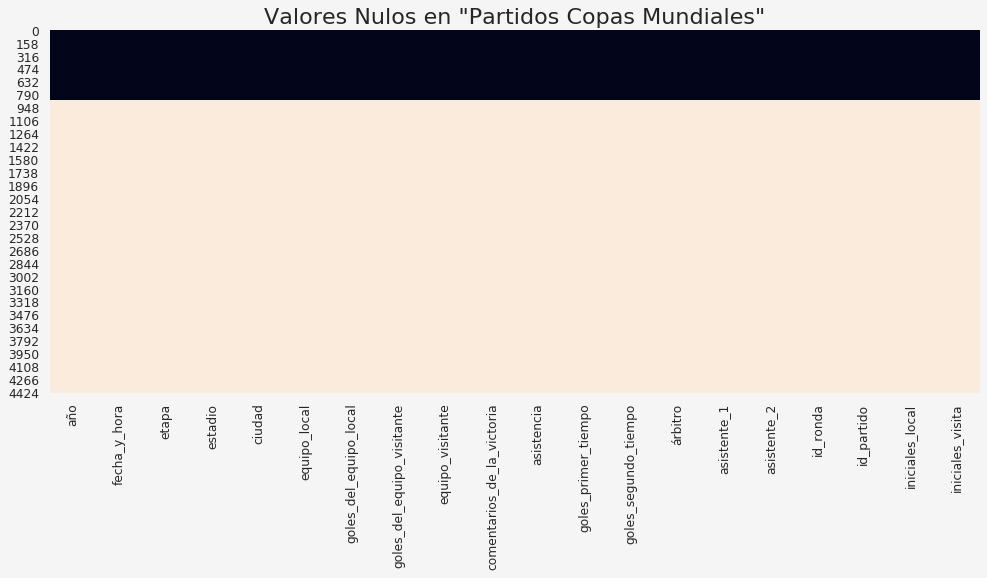

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
año                           852 non-null float64
fecha_y_hora                  852 non-null object
etapa                         852 non-null object
estadio                       852 non-null object
ciudad                        852 non-null object
equipo_local                  852 non-null object
goles_del_equipo_local        852 non-null float64
goles_del_equipo_visitante    852 non-null float64
equipo_visitante              852 non-null object
comentarios_de_la_victoria    852 non-null object
asistencia                    850 non-null float64
goles_primer_tiempo           852 non-null float64
goles_segundo_tiempo          852 non-null float64
árbitro                       852 non-null object
asistente_1                   852 non-null object
asistente_2                   852 non-null object
id_ronda                      852 non-null float64
id_partido                    852 no

None

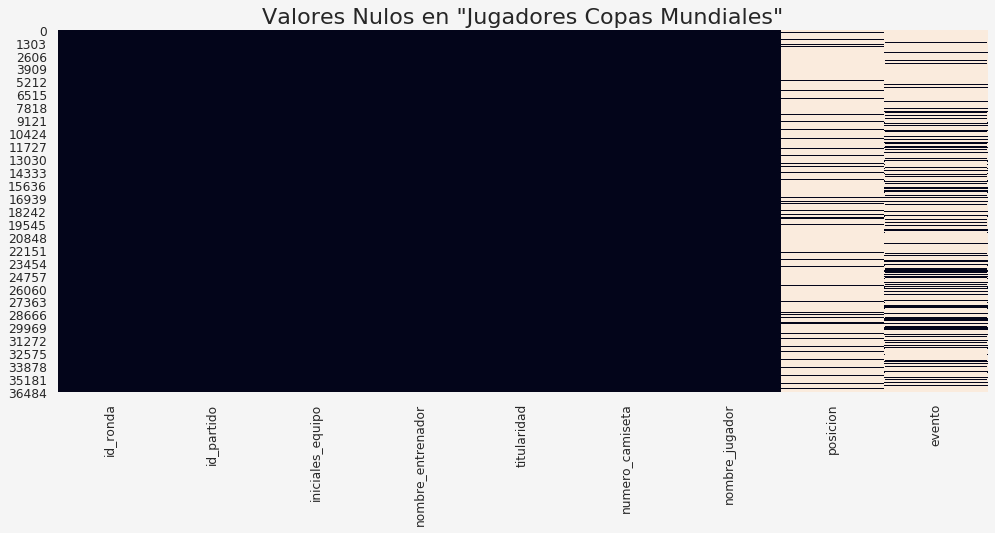

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
id_ronda             37784 non-null int64
id_partido           37784 non-null int64
iniciales_equipo     37784 non-null object
nombre_entrenador    37784 non-null object
titularidad          37784 non-null object
numero_camiseta      37784 non-null int64
nombre_jugador       37784 non-null object
posicion             4143 non-null object
evento               9069 non-null object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


None

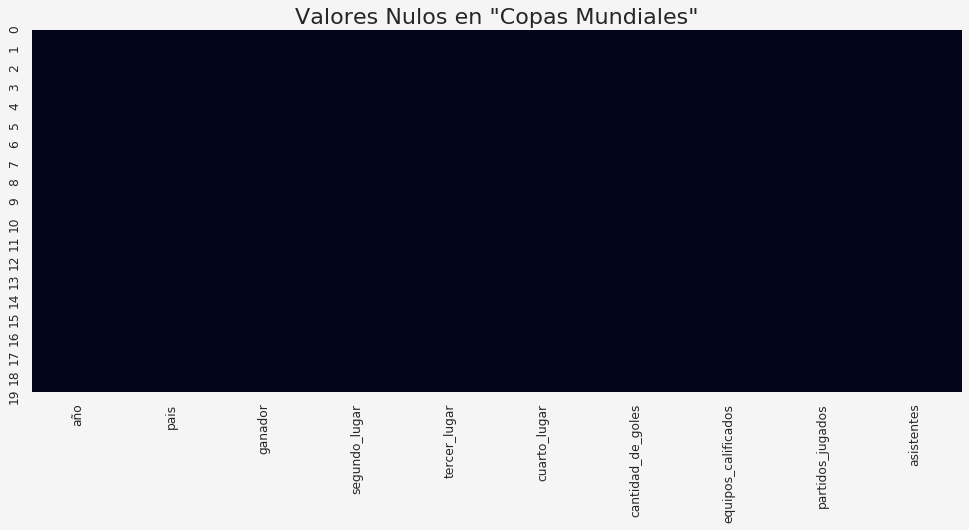

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
año                    20 non-null int64
pais                   20 non-null object
ganador                20 non-null object
segundo_lugar          20 non-null object
tercer_lugar           20 non-null object
cuarto_lugar           20 non-null object
cantidad_de_goles      20 non-null int64
equipos_calificados    20 non-null int64
partidos_jugados       20 non-null int64
asistentes             20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


None

In [8]:
# Se grafican y tabulan los nulos de todas las bases de datos:
for db in dbs:
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
  sns.heatmap(db.table.isnull(), cbar=False)
  plt.title('Valores Nulos en "{}"'.format(db.name), fontsize=20)
  # save_graph(modify_text('Valores Nulos en "{}"'.format(dfs[1].name)))
  plt.show()
  display(db.table.info())
  print()

ANÁLISIS:

La tabla de partidos tiene todos los valores completos hasta la fila 852 y desde ahí en adelante todos los valores son nulos, por lo que se eliminan todas esas filas.

En la tabla de jugadores las columnas de posiciones y eventos tienen una gran cantidad de nulos, pero eliminar estos nulos implicaría perder a una gran cantidad de jugadores y de información útil para los análisis. Es por esto que el tratamiento de estos núlos se dejará para el caso en dónde solo se necesiten los datos de esas columnas y no de los demás jugadores.

En la tabla de copas mundiales no hay nulos.

In [9]:
# Se eliminan las filas vacías de la tabla de partidos:
print('La base de datos {} tiene {} filas y {} columnas\nProcesando...'\
      .format(wc_matches_info.name, wc_matches_info.table.shape[0],
              wc_matches_info.table.shape[1]))
wc_matches_info.table = wc_matches_info.table.iloc[0:852, :]
print('La base de datos {} tiene {} filas y {} columnas'\
      .format(wc_matches_info.name, wc_matches_info.table.shape[0],
              wc_matches_info.table.shape[1]))

La base de datos Partidos Copas Mundiales tiene 4572 filas y 20 columnas
Procesando...
La base de datos Partidos Copas Mundiales tiene 852 filas y 20 columnas


### Tipos de Datos

In [10]:
# Se muestran las columnas categóricas y numéricas de cada tabla:
for df in dbs:
  print(f'BASE DE DATOS: {db.name}\n')
  print(f'Columnas con valores categóricos:"')
  print(list(map(lambda col: col.name, filter(lambda col: col.coltype in ('CAT_ORD', 'CAT_NO_ORD'), df.columns))))
  print(f'\nColumnas con valores numéricos:"')
  print(list(map(lambda col: col.name, filter(lambda col: not (col.coltype in ('CAT_ORD', 'CAT_NO_ORD')), df.columns))))
  print('\n'+ '_'*200 + '\n')

BASE DE DATOS: Copas Mundiales

Columnas con valores categóricos:"
['etapa', 'estadio', 'ciudad', 'equipo_local', 'equipo_visitante', 'comentarios_de_la_victoria', 'árbitro', 'asistente_1', 'asistente_2', 'iniciales_local', 'iniciales_visita']

Columnas con valores numéricos:"
['año', 'fecha_y_hora', 'goles_del_equipo_local', 'goles_del_equipo_visitante', 'asistencia', 'goles_primer_tiempo', 'goles_segundo_tiempo', 'id_ronda', 'id_partido']

________________________________________________________________________________________________________________________________________________________________________________________________________

BASE DE DATOS: Copas Mundiales

Columnas con valores categóricos:"
['iniciales_equipo', 'nombre_entrenador', 'titularidad', 'nombre_jugador', 'posicion', 'evento']

Columnas con valores numéricos:"
['id_ronda', 'id_partido', 'numero_camiseta']

___________________________________________________________________________________________________________

### Eliminación de Duplicados

In [11]:
for db in dbs:
  print('La base de datos "{}" tiene {} filas y {} columnas.\n'.format(db.name, db.table.shape[0], db.table.shape[1]))
  db.table.drop_duplicates()
  print('Ahora la base de datos "{}" tiene {} filas y {} columnas.\n'.format(db.name, db.table.shape[0], db.table.shape[1]))

La base de datos "Partidos Copas Mundiales" tiene 852 filas y 20 columnas.

Ahora la base de datos "Partidos Copas Mundiales" tiene 852 filas y 20 columnas.

La base de datos "Jugadores Copas Mundiales" tiene 37784 filas y 9 columnas.

Ahora la base de datos "Jugadores Copas Mundiales" tiene 37784 filas y 9 columnas.

La base de datos "Copas Mundiales" tiene 20 filas y 10 columnas.

Ahora la base de datos "Copas Mundiales" tiene 20 filas y 10 columnas.



## 2) Tratamiento de Outliers

Identifique y establezca un protocolo para tratar outliers.

In [12]:
print('La columna "{}" es de tipo "{}"\nProcesando...'\
      .format(wc_info.get_column('asistentes').name, wc_info.table.asistentes.dtype))

for i in range(len(wc_info.table.asistentes)):
  wc_info.table.at[i, 'asistentes'] = int(wc_info.table.asistentes[i].replace('.',''))
wc_info.table.astype({'asistentes':int}, copy=False)

print('Ahora los elementos de la columna son números enteros')
# print('La columna "{}" es de tipo "{}"\n\n'\
#       .format(wc_info.get_column('asistentes').name, wc_info.table.asistentes.dtype))

La columna "asistentes" es de tipo "object"
Procesando...
Ahora los elementos de la columna son números enteros


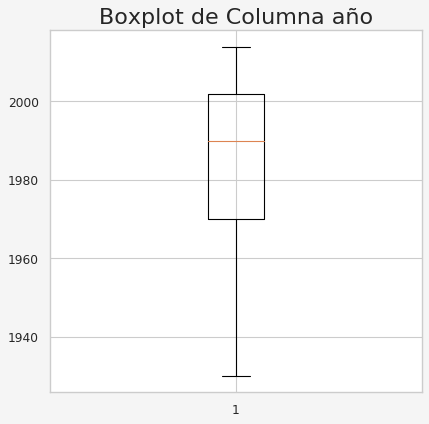

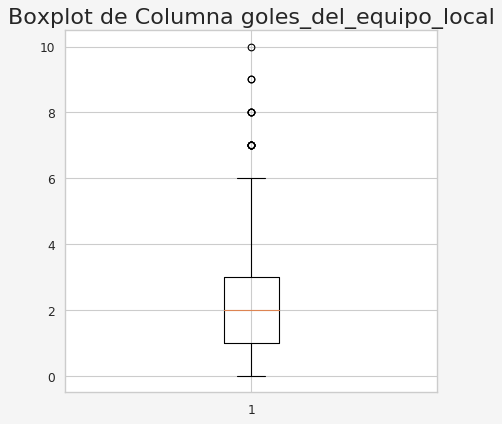

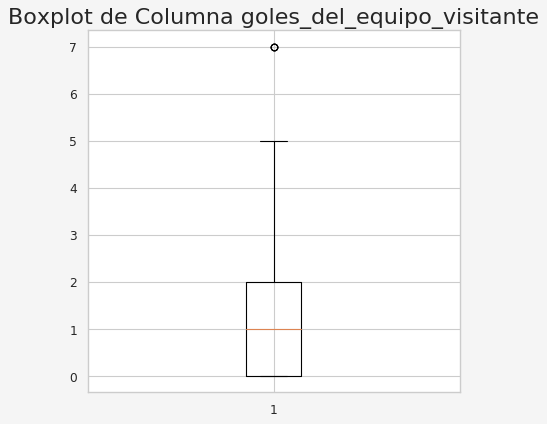

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


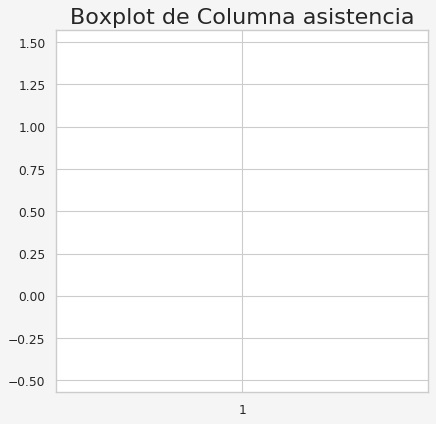

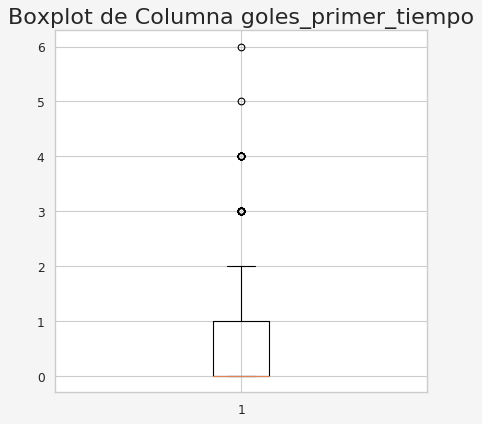

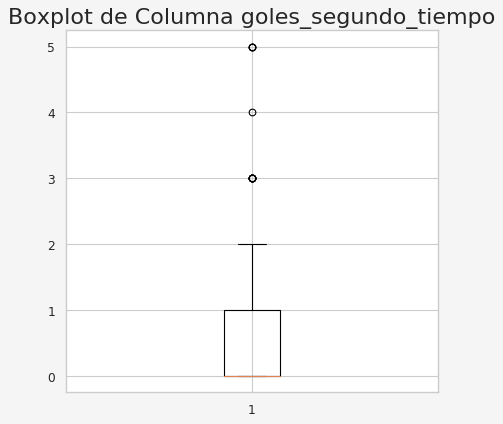

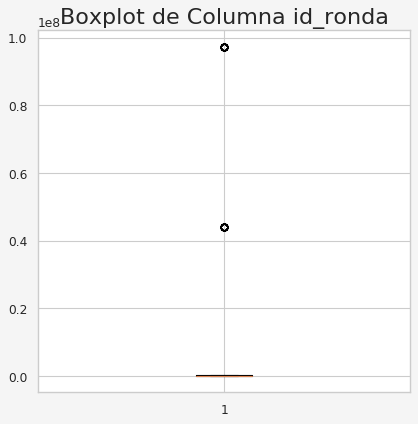

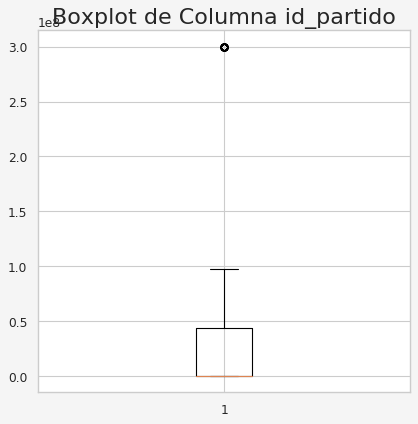

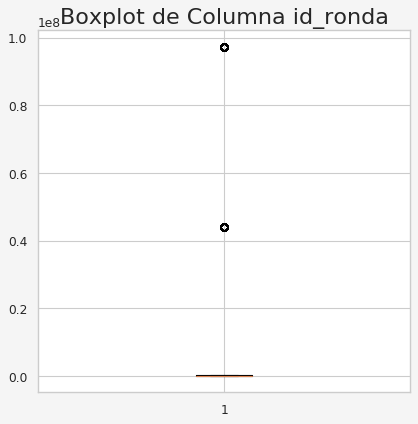

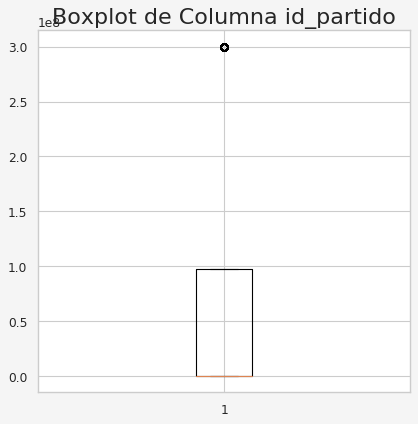

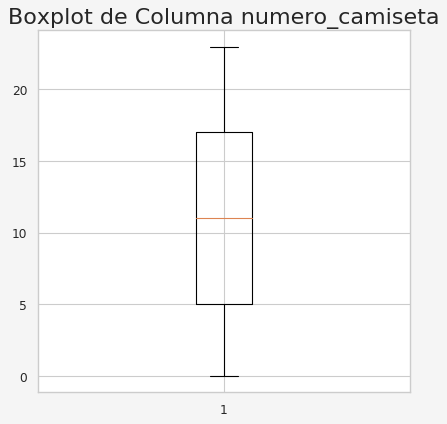

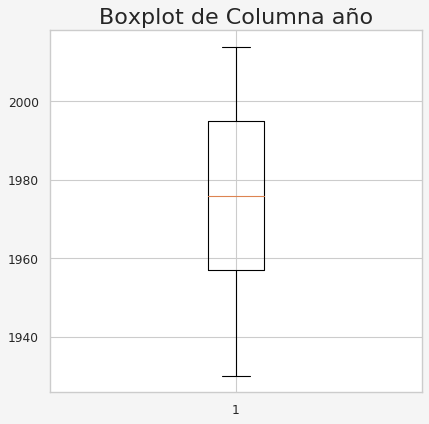

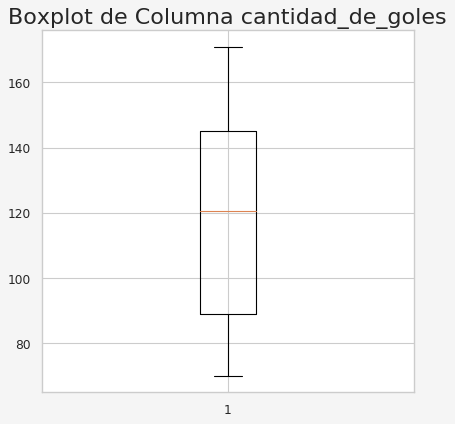

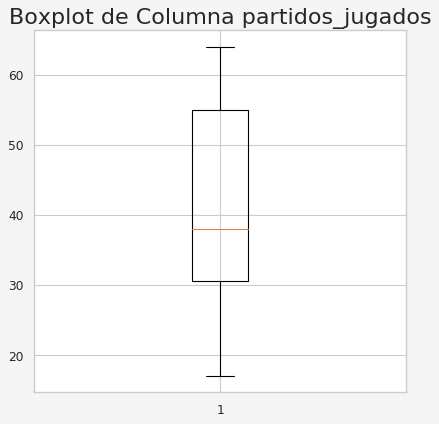

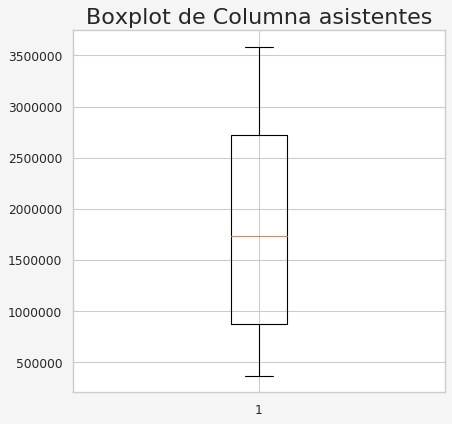

In [13]:
for db in dbs: 
  for col_name in map(lambda col: col.name, filter(lambda col: (col.coltype in ['NUM_DIS','NUM_CON']) and (col.name != 'fecha_y_hora'), db.columns)):
    boxplot_graph(db.table[col_name], col_name)

In [14]:
def replace_outliers(df, col_name):
  column = df.loc[:,col_name]
  # Cálculo de la media truncada:
  trim_mean = int(tm(column.values, 0.15, axis=0))

  # Array de datos repetidos para reemplazar:
  data_to_replace = np.repeat(np.c_[trim_mean, trim_mean], 9, axis=1)
  
  # Cálculo de límites:
  upper_lim = column.mean() + 3*column.std()
  lower_lim = column.mean() - 3*column.std()
  
  # Se encuentran los otliers y se reemplazan por la media de los datos truncados:
  without_ol = column\
  .where(column.gt(lower_lim),trim_mean)\
  .where(column.lt(upper_lim), trim_mean)

  # Se guarda la columna modificada en el DataFrame
  df.loc[:,col_name] = without_ol


# Se eliminan los outliers de todas las columnas con datos numéricos:
for db in dbs: 
  for col_name in map(lambda col: col.name, filter(lambda col: (col.coltype in ['NUM_DIS','NUM_CON']) and (col.name != 'fecha_y_hora'), db.columns)):
    replace_outliers(db.table, col_name)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


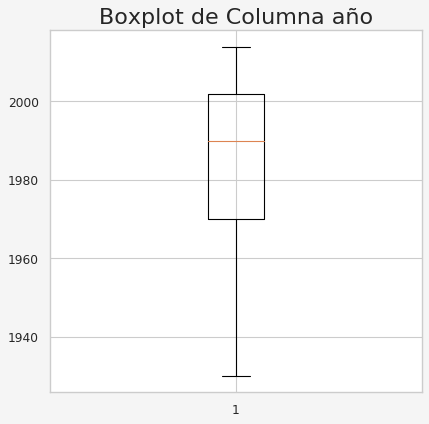

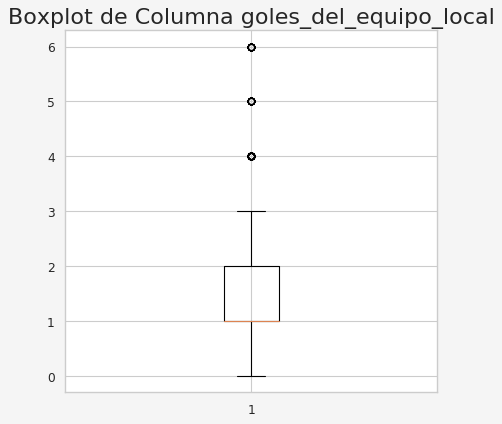

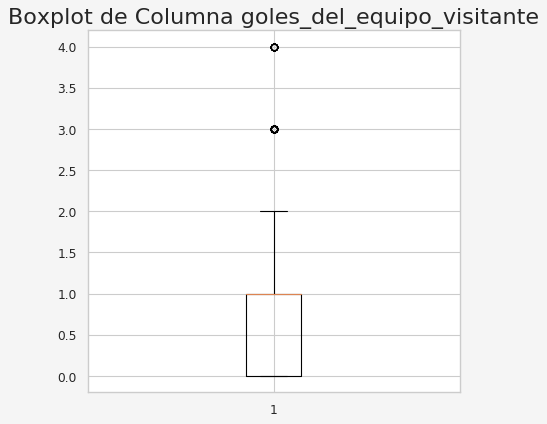

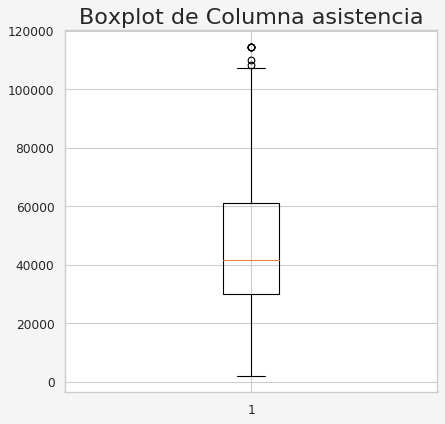

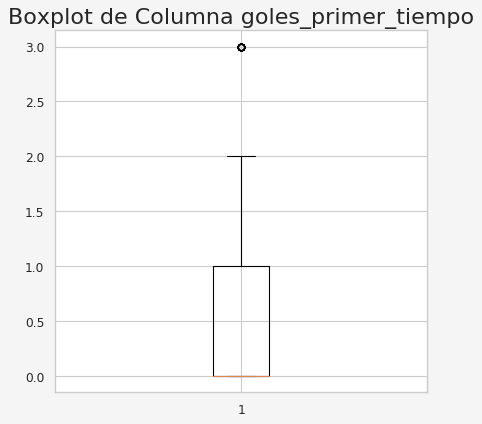

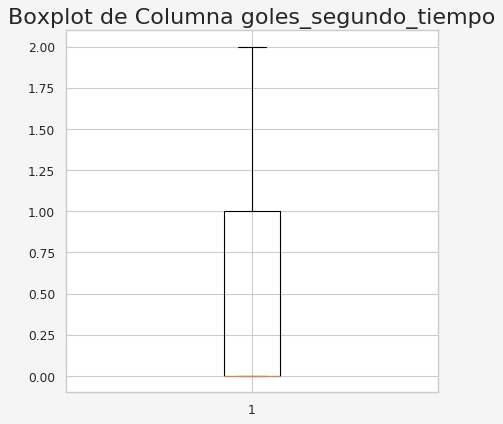

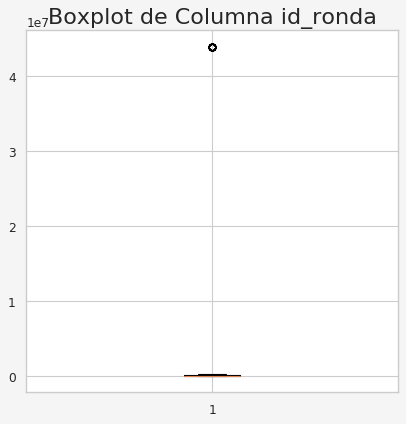

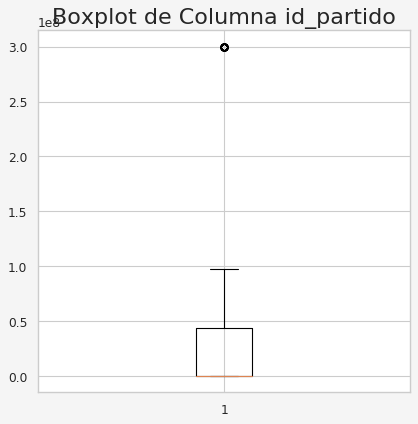

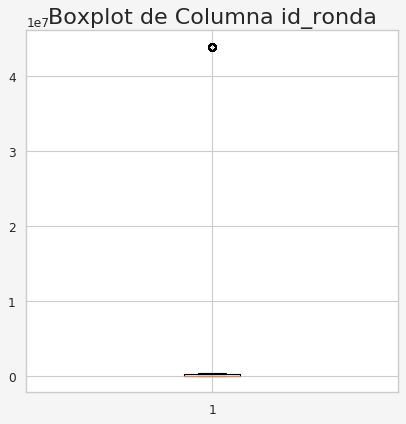

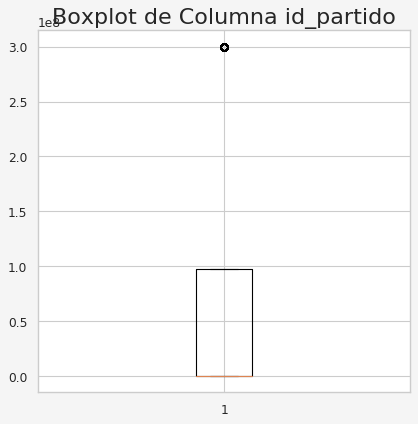

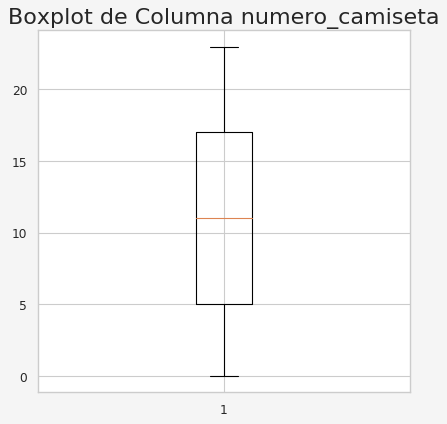

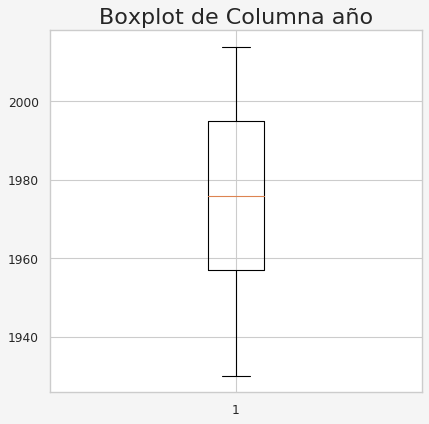

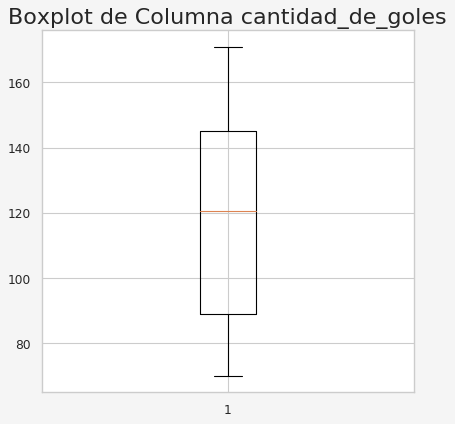

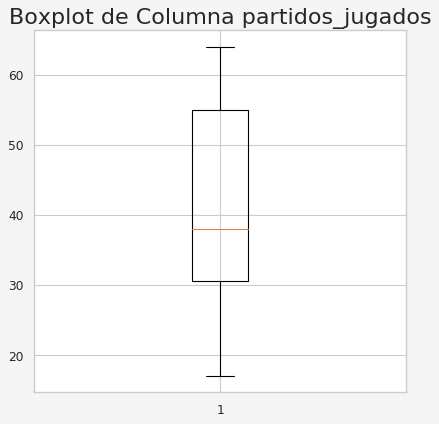

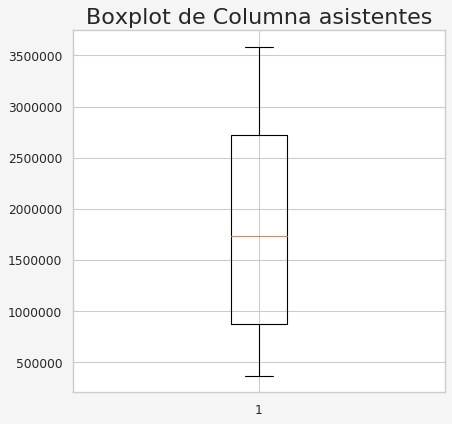

In [15]:
for db in dbs: 
  for col_name in map(lambda col: col.name, filter(lambda col: (col.coltype in ['NUM_DIS','NUM_CON']) and (col.name != 'fecha_y_hora'), db.columns)):
    boxplot_graph(db.table[col_name], col_name)

## 3) Visualizaciones

Obtenga visualizaciones pertinentes a su análisis sobre los mundiales.


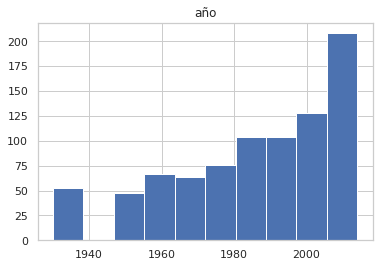

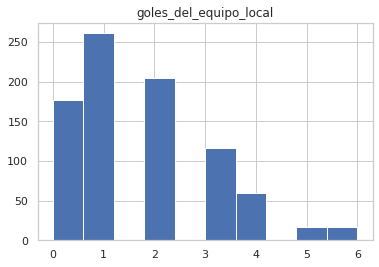

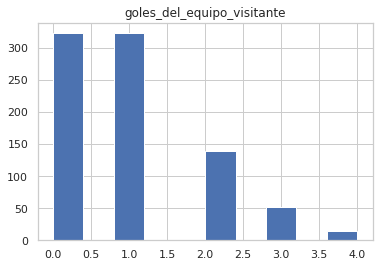

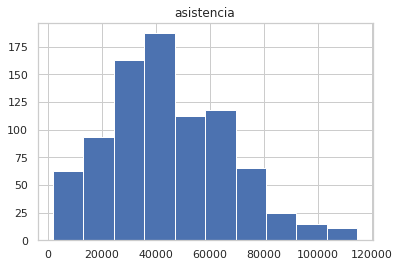

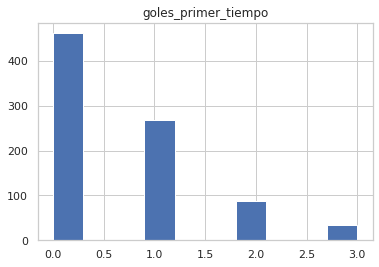

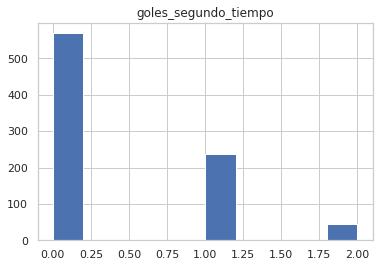

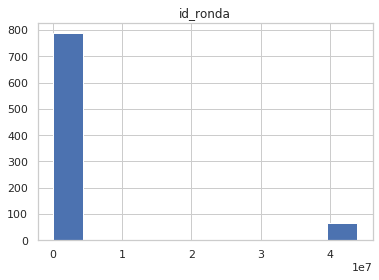

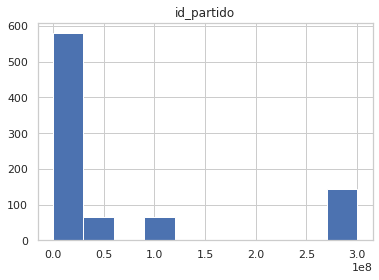

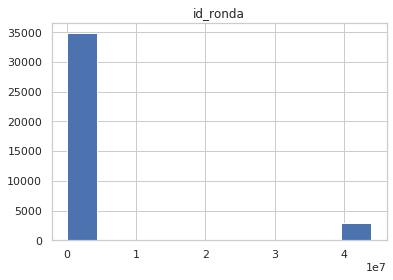

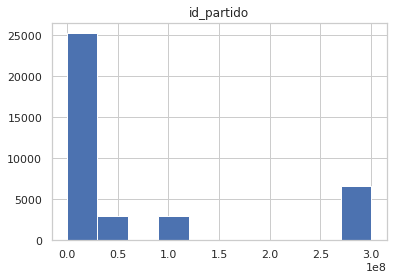

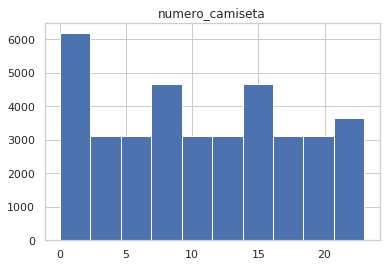

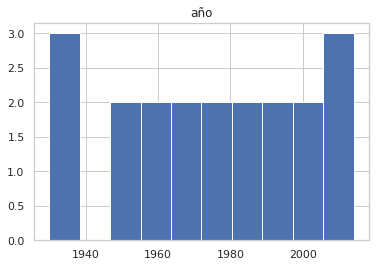

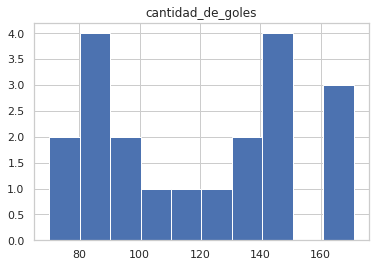

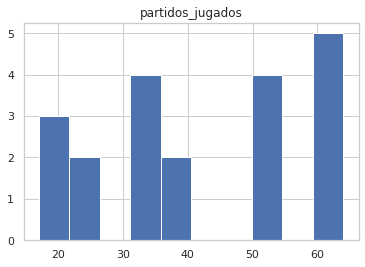

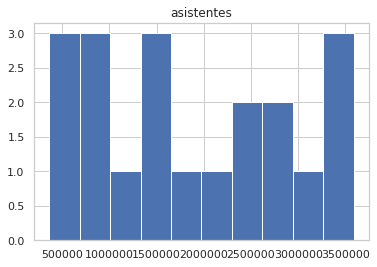

In [16]:
for db in dbs: 
  for col_name in map(lambda col: col.name, filter(lambda col: (col.coltype in ['NUM_DIS','NUM_CON']) and (col.name != 'fecha_y_hora'), db.columns)):
    db.table[col_name].hist()
    plt.title(col_name)
    # save_graph(modify_text('histogram'+col_name))
    plt.show()
    print()
